![](https://snag.gy/h9Xwf1.jpg)

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Introduction to `pandas` 2

_Authors: Dave Yerrington (SF)_

---

`pandas` is the most popular python package for managing datasets and is used extensively by data scientists.

### Learning Objectives

- Series axis 1 vs 0
- Understanding Pandas datatypes
- Selection of data
 - Filtering / masking
- Basic Plotting

### Lesson Guide

- [Pandas Indexing](#indexing)
- [Creating DataFrames](#creating_dataframes)
- [Checking Data Types](#dtypes)
- [Renaming and Assignment](#renaming_assignment)
- [Basic `pandas` Plotting](#basic_plotting)
- [Logical Filtering](#filtering)
- [Review](#review)

### There's more to know about Series

There are many operations we can perform on our DataFrames.  Before we step too far into the world of complex transformations, it's important to note the two main aspects of how **series** data can be accessed within a _DataFrame_.

### Axis = 1: Columns

So far we know we can select one, or many column series within brackets `df[series references here]`.  This selector works with columns which are a series.  We can access the columns axis by _column name_, or _numeric index_.
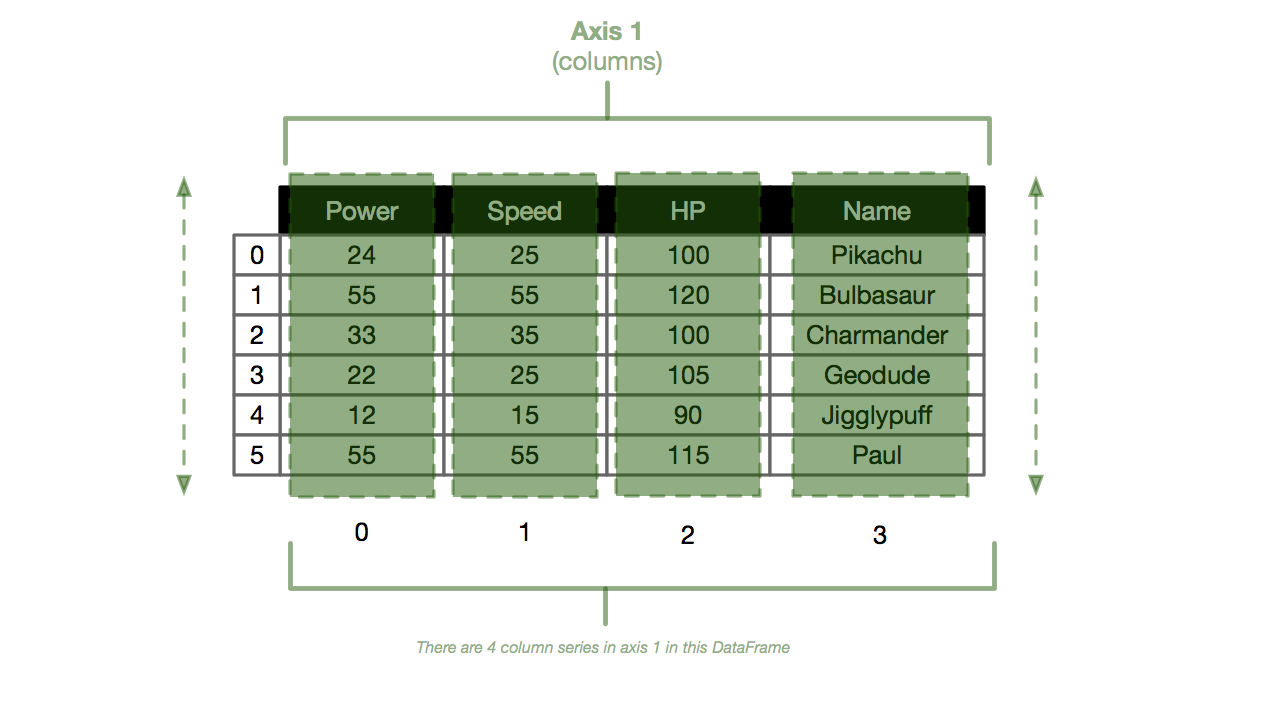

### Axis = 0:  Rows

There are times we might want to access our data by the row element.  As we get into cleaning data and transforming it for the various applications we will be using, this is also another aspect of accessing our _DataFrames_ that we will need to be familliar with.  We can access the rows axis by literal index value (even if it's a string), or by numeric index.  More on this in the near future.

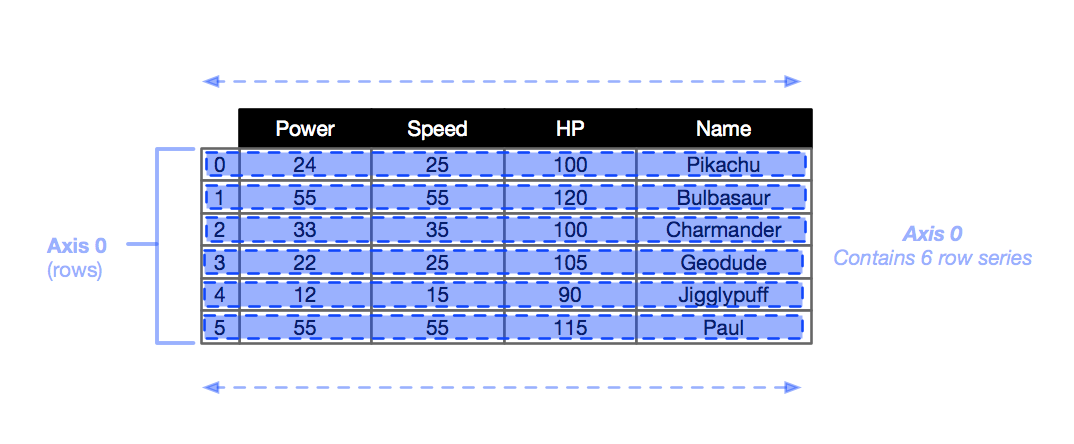

#### What we can do with axis:
- Select series by row (axis 0), or column (axis 1).
- Use `.map()` functions on individual columns (series), or `.apply()` on row or access over the entire DataFrame.
- We can talk to our friends and colleagues about data in a very specific way.

<a id='indexing'></a>

### Pandas Indexing 

---

More often than not, we want to operate on or extract specific portions of our data. When we perform indexing on a DataFrame or Series we can specifying the specific section of the data we want to operate on.

Pandas has three properties that you can use for indexing:

- **`.loc`** indexes with the _labels_ for rows and columns axis.
- **`.iloc`** indexes with the _integer positions_ for rows and columns axis.
> In the newer versions of Pandas `.ix` is now deprecated for those who are familliar with it. **`.ix`** indexes with _both labels and integer positions.  Leaving this here for future reference_.

To help clarify these differences, lets first re-set the row labels to letters using the ```.set_index()``` function (or setting the index property explicity):

In [199]:
import pandas as pd

# Lets load this drug data again.
drug = pd.read_csv("./datasets/drug-use-by-age.csv")

In [206]:
new_index_values = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q']
# Update our index to this new set of values:  Is this new_index_values a series?
drug.index = new_index_values
drug.head(7)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
A,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
B,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
C,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
D,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
E,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
F,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
G,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0


Using the **`.loc`** indexer, we can pull out the rows **B thru F** and the columns **marijuana-use and marijuana-frequency**.

In [218]:
drug.index[1:6]

Index(['B', 'C', 'D', 'E', 'F'], dtype='object')

In [221]:
# ['B','C','D','E','F'], ["marijuana-use", "marijuana-frequency]
# subset = drug.loc[???????]
drug.loc['B':'F', ["marijuana-use", "marijuana-frequency"]]

,marijuana-use,marijuana-frequency
B,3.4,15.0
C,8.7,24.0
D,14.5,25.0
E,22.5,30.0
F,28.0,36.0


We can do the same thing with the **`.iloc`** indexer, but we have to use integers for the location.

In [230]:
test = [1,2,3,4,5,6]
test[2:5]

[3, 4, 5]

In [225]:
# [1,2,3,4,5], [4,5]
# subset = drug.iloc[?????????]
drug.iloc[1:6, [4,5]]

,marijuana-use,marijuana-frequency
B,3.4,15.0
C,8.7,24.0
D,14.5,25.0
E,22.5,30.0
F,28.0,36.0


In [235]:
drug.loc["B":"E", drug.columns[4:6]]

,marijuana-use,marijuana-frequency
B,3.4,15.0
C,8.7,24.0
D,14.5,25.0
E,22.5,30.0


If we you index the rows or columns with integers using **`.loc`**, you will get an error.

##### How can we reference the variables "age" and "crack-use", but only rows "C" and "F"?

In [236]:
# A:
drug.loc[['C', 'F'], ['age', 'crack-use']]

,age,crack-use
C,14,0.0
F,17,0.1


In [237]:
drug.iloc[[2,5],[0,8]]

,age,crack-use
C,14,0.0
F,17,0.1


<a id='creating_dataframes'></a>

### Creating DataFrames

---

The simplest way to create your own dataframe when not importing from a file is to give the ```pd.DataFrame()``` instantiator a dictionary.

In [238]:
{
    'Letters':  ['A','B','C'], 
    'Integers': [1,2,3], 
    'Floats':   [2.2, 3.3, 4.4],
}

{'Letters': ['A', 'B', 'C'], 'Integers': [1, 2, 3], 'Floats': [2.2, 3.3, 4.4]}

In [242]:
import numpy as np

mydata = pd.DataFrame({
    'Letters':  ['A','B','C'], 
    'Integers': [1,2,3], 
    'Floats':   [2.2, 3.3, 4.4],
})

In [240]:
mydata

,Floats,Integers,Letters
0,2.2,1,A
1,3.3,2,B
2,4.4,3,C


In [243]:
raw_data = [
    ("A", 1, 2.2),
    ("B", 2, 3.3),
    ("C", 3, 4.4)
]

In [246]:
# Check it out
test_df = pd.DataFrame(raw_data, columns=["Letters", "Ints", "Floats"])

As you might expect, the dictionary needs to have lists of values that are all the same length. The keys correspond to the names of the columns and the values correspond to the data in the columns.

In [251]:
test_df.iloc[0, 1] = 9000
test_df

,Letters,Ints,Floats
0,A,9000,2.2
1,B,2,3.3
2,C,3,4.4


In [252]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
Letters    3 non-null object
Ints       3 non-null int64
Floats     3 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 152.0+ bytes


<a id='dtypes'></a>

### Examining data types

---

Pandas comes with a useful property to look at just the data types of your DataFrame columns. Use ```.dtypes``` on your DataFrame:

In [254]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
Floats      3 non-null float64
Integers    3 non-null int64
Letters     3 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 152.0+ bytes


In [253]:
# A:
mydata.dtypes

Floats      float64
Integers      int64
Letters      object
dtype: object

This will show you what data type each column is. Strings are stored as a type called "object" because they are not guaranteed to take up a set amount of space (strings can be of any length).

#### Can you think of any reasons why you might want to check your dtypes?

<a id='renaming_assignment'></a>

### Renaming and Assignment

---

Pandas makes it easy to change column names and assign values to your DataFrame.

Say we wanted to change the column name "Integers" to "int":

In [255]:
## Check out columns property
mydata.columns

Index(['Floats', 'Integers', 'Letters'], dtype='object')

In [189]:
# Use rename function -- reference inline documentation 
# inplace = True updates mydata
# print(mydata.columns)

In [263]:
column_map = {
    "Floats": "flt",
    "Integers": "ints",
    "Letters": "text"
}

# Method 1
mydata = mydata.rename(columns=column_map)

# Method 2
mydata.rename(columns=column_map, inplace=True)

In [264]:
mydata

,flt,ints,text
0,2.2,1,A
1,3.3,2,B
2,4.4,3,C


In [188]:
# Display DataFrame post-rename operation


If you wanted to change every column name, you could just assign a new list to the ```.columns``` property.

In [269]:
# Rename columns via property to ['A','B','C']
# mydata.head()

mydata.columns = ['A','B','C']
mydata

,A,B,C
0,2.2,1,A
1,3.3,2,B
2,4.4,3,C


In [272]:
# Select all rows in iloc[:], with columns 0:3, iloc[,0:3]

mydata.iloc[:, 0:3]

,A,B,C
0,2.2,1,A
1,3.3,2,B
2,4.4,3,C


In [185]:
# Selecting series with column reference for features 0:3

We can assign values using the indexing that we learned before.

Let's change the newly renamed "B" column at row index 1 to be 100.

In [273]:
mydata

,A,B,C
0,2.2,1,A
1,3.3,2,B
2,4.4,3,C


In [277]:
# .loc[?, ??]
mydata.loc[1, 'B'] = 100
mydata

,A,B,C
0,2.2,1,A
1,3.3,100,B
2,4.4,3,C


In [279]:
mydata.iloc[1, 1] = 200

In [280]:
mydata

,A,B,C
0,2.2,1,A
1,3.3,200,B
2,4.4,3,C


Alternatively we can assign multiple values at once with lists.

In [283]:
mydata

,A,B,C
0,2.2,1,A
1,3.3,200,B
2,4.4,3,C


In [282]:
mydata.loc[0, ['B','C']]

B    1
C    A
Name: 0, dtype: object

In [285]:
# mydata.loc[:, 'a'] = [0,0,0]
# mydata

# mydata.loc[0, ['b','c']]
mydata.loc[0, ['B','C']] = [-1000, 'newstring']
mydata.head()

,A,B,C
0,2.2,-1000,newstring
1,3.3,200,B
2,4.4,3,C


<a id='basic_plotting'></a>

### Basic plotting using DataFrames

---

DataFrames also come with some basic convenience functions for plotting data. First import matplotlib and set it to run "inline" in your notebook.

In [288]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

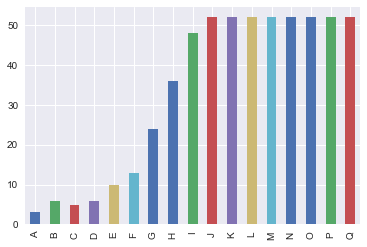

In [292]:
drug['alcohol-frequency'].plot(kind="bar")

Using our ```drug``` DataFrame again, use the ```.plot()``` function to plot the **age** columns against the **marijuana-use** column.

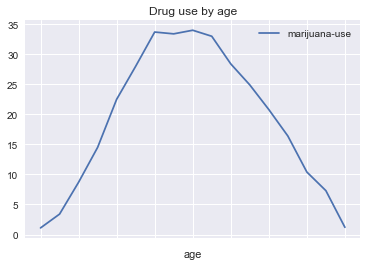

In [295]:
# plot x as age, y as marijuana-use - title="Drug use by age"

drug.plot(x="age", y="marijuana-use", title="Drug use by age")

The ```.hist()``` function will create a histogram for a column's values.

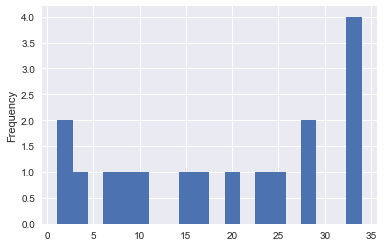

In [298]:
# Plot histogram of feature / variable / column: "marijuana-use"
drug["marijuana-use"].plot(kind="hist", bins=20)

### Pandas plotting features

It's very handy to be able to plot multiple figures within a single figure.  Since Pandas uses Matplotlib under the hood, it's very useful to combine these tools to get the most out of your plots.

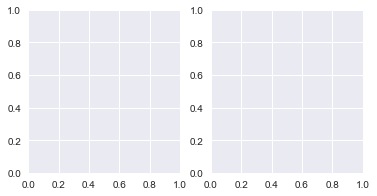

In [300]:
# import matplotlib, setup figure with 1 row and 2 columns - blank
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

Accessing our individual sub-figure plots can be done via `ax[index]` that we defined earlier.

Text(0.1,0.5,'this is ax[1]')

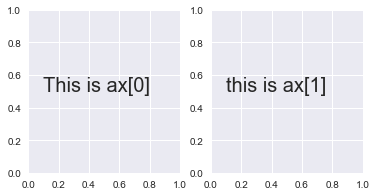

In [306]:
# Same plot as before, but with text features
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
ax[0].text(s="This is ax[0]", x=.1, y=.5, size=20)
ax[1].text(s="this is ax[1]", x=.1, y=.5, size=20)

### Adding our Pandas plots using `ax`

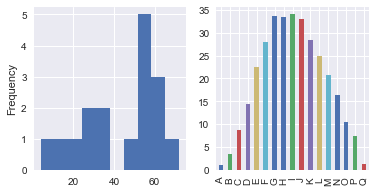

In [311]:
## Plot both line plot and histogram in one figure, from Pandas to Matplotlib
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

drug['marijuana-frequency'].plot(kind="hist", ax = ax[0])
drug['marijuana-use'].plot(kind="bar", ax = ax[1])

### More than one row



In [179]:
## Demonstrate multiple ax row / column reference

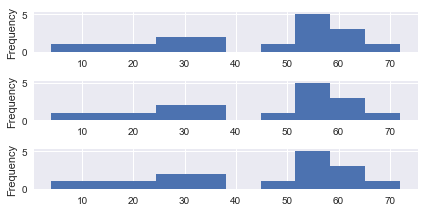

In [317]:
## 3 rows of figures
figure, ax = plt.subplots(nrows=3, ncols=1, figsize=(6, 3))

drug['marijuana-frequency'].plot(kind="hist", ax = ax[0])
drug['marijuana-frequency'].plot(kind="hist", ax = ax[1])
drug['marijuana-frequency'].plot(kind="hist", ax = ax[2])

plt.tight_layout()

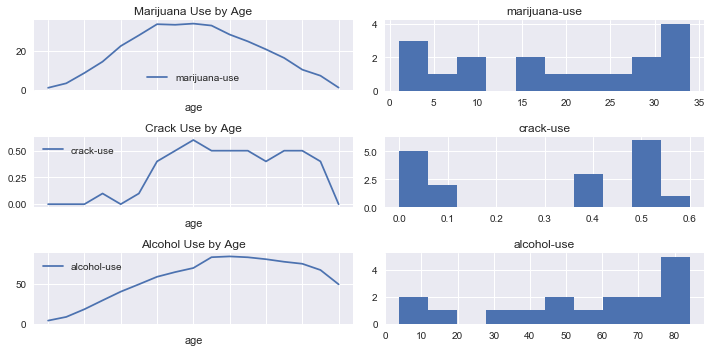

In [320]:
## 6 plots -- 3x2
figure, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 5))

# marijuana
drug.plot(title="Marijuana Use by Age", x='age', y='marijuana-use', ax=ax[0, 0])
drug.hist('marijuana-use', ax=ax[0, 1])

# crack
drug.plot(title="Crack Use by Age", x='age', y='crack-use', ax=ax[1, 0])
drug.hist('crack-use', ax=ax[1, 1])

# crack
drug.plot(title="Alcohol Use by Age", x='age', y='alcohol-use', ax=ax[2, 0])
drug.hist('alcohol-use', ax=ax[2, 1])

figure.tight_layout() ## this will pad your figures slightly

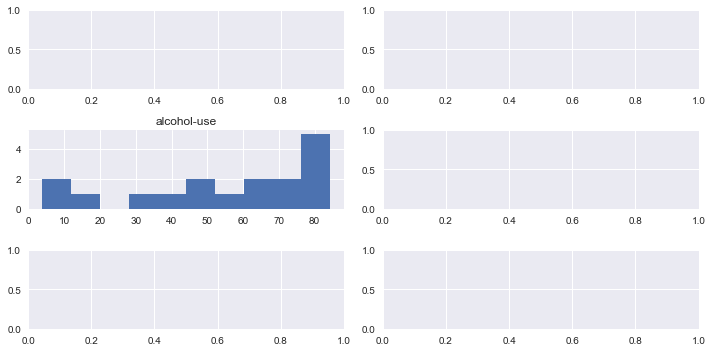

In [323]:
figure, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 5))
drug.hist('alcohol-use', ax=ax[1,0])

plt.tight_layout()

<a id='filtering'></a>

### Filtering Logic

---

One of the most powerful features of DataFrames is using logical commands to filter data.

Subset the ```drug``` data for only the rows where marijuana-use is greater than 20.

In [335]:
# A:

mask = drug['marijuana-use'] > 20
drug[mask].head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
E,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
F,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
G,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
H,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
I,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0


In [326]:
# import seaborn as sns
# sns.heatmap(drug.corr())

The ampersand sign can be used to subset where multiple conditions need to be met for each row. 

Subset the data for marijuana use over 20, as before, but now also where the n is greater than 4000.

In [343]:
# A:
# drug[]
mask = (drug['marijuana-use'] > 20) & (drug['n'] > 4000)
drug[mask]

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
K,22-23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,...,1.7,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0
L,24-25,4591,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,...,1.3,20.0,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5


In [349]:
drug.query("n > 80").head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
A,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
B,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
C,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
D,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
E,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [353]:
# Sorting Demo - quick
drug.sort_values("marijuana-use", ascending=False)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
I,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
G,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
H,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
J,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0
K,22-23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,...,1.7,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0
F,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
L,24-25,4591,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,...,1.3,20.0,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5
E,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
M,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
N,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0


"#### Time Permitting:  Map + Apply Demo

<a id='review'></a>

### Review

---

 - What is axis 1 vs 0 and how can we use them?
 - How do we slice? Index? Filter?
 - Why might we inspect our datatypes?
 - How do we use Pandas plots with Matplotlib to create multiple sub-figures in a single figure?

In [358]:
# drug.iloc[start:end, start:end]
drug.iloc[[0, 2, 6], [0, 5, 9]]

,age,marijuana-frequency,crack-frequency
A,12,4.0,-
C,14,24.0,-
G,18,52.0,10.0


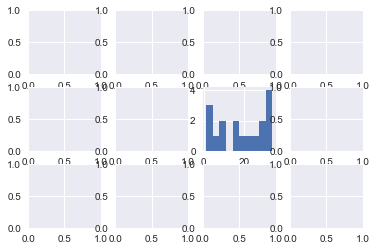

In [360]:
figure, ax = plt.subplots(nrows=3, ncols=4)
drug['marijuana-use'].hist(ax=ax[1,2])